# Training Data Exploratory Analysis

## Notebook Goal

We want to examine the various datasets that were gathered to help determine their potential for our overall goal. Just to be clear we are attempting to find data that will best help determine the irrational statements made by a client in a therapy session. This problem might be a difficult one to solve due to the limitations of the datasets that we have put together but more on that as we go along. There will also be some more information as we examine each dataset about its source and how it was put together.


## Table of Contents

- **Data Information**
    - [Source Links](#The-DataSets-and-their-relative-sources-are-as-follows)
    - [Variable Key](#DataSet-Variable-Keys)

- **EDA**
    - [Positive and Negative Sentences](#Positive-and-Negative-Sentences)
    - [A Million Tweets](#A-Million-Tweets)
    - [Data World Emotion Classifier](#Data-World-Emotion-Classifier)
    - [The Other Emotion Classifier](#The-Other-Emotion-Classifier)
    - [Word Based Emotion Classification](#Word-Based-Emotion-Classification)

**The DataSets and their relative sources are as follows:** 

|Basic Description|Source|
|:---|:---|
|Positive and Negative sentences. |[Kaggle Positive and Negative Sentences](https://www.kaggle.com/chaitanyarahalkar/positive-and-negative-sentences)|
|1,600,000 tweets examined based on emoticons on a negative-positive scale of 0-4. |[Tweet Emoticon Emotional Classifier](https://www.kaggle.com/kazanova/sentiment140)|
|An emotional analysis dataset that was gathered manually.|[Sentiment Analysis: Emotion in Text from DataWorld](https://data.world/crowdflower/sentiment-analysis-in-text)|
|A second emotional analysis dataset. |[Emotion Classification](https://www.kaggle.com/eray1yildiz/emotion-classification)|
|An emotional analysis based on words. |[Word Based Emotion Classification](https://www.kaggle.com/iwilldoit/emotions-sensor-data-set)|

In [3]:
# Do our basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import regex as re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

Let's read in all our data now and examine them one by one. <br>
Here is a key for the variables that I will be using for each data set.
#### DataSet Variable Keys
|Variable Name|Corresponding Dataset|
|:---|:---|
| **pos_neg_sen**   |     Positive and Negative sentences (I'm going to have to combine two datasets for this one).|
| **mil_tweets**    |     1,600,000 tweets examined based on emoticons on a negative-positive scale of 0-4.|
| **six_emotions**   |     An emotional analysis dataset that was gathered manually.|
| **word_emotions**   |     An emotional analysis based on words.|
| **twelve_emotions**  |     A second emotional analysis dataset.|

In [6]:
# The two datasets that I will combine into one
neg_sent = pd.read_csv('../data/Training_Data/1_Uncleaned_Training_Data/Negative_Sentences.csv', )
pos_sent = pd.read_csv('../data/Training_Data/1_Uncleaned_Training_Data/Positive_Sentences.csv')
# The rest of our datasets.
mill_tweets = pd.read_csv('../data/Training_Data/1_Uncleaned_Training_Data/training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1")
twelve_emotions = pd.read_csv('../data/Training_Data/1_Uncleaned_Training_Data/text_emotion.csv')
word_emotions = pd.read_csv('../data/Training_Data/1_Uncleaned_Training_Data/Andbrain_DataSet.csv')
six_emotions = pd.read_csv('../data/Training_Data/1_Uncleaned_Training_Data/emotion.data')

## Positive and Negative Sentences
We'll examine the first dataset here. So we'll give you a little background on what it could potentially accomplish as well as how the data was gathered. 

Since the overall goal is to find the irrational aspects of a clients thinking through what was said in a session, the best case scenario would be to have data that properly differentiates between irrational and rational thinking. However, despite an exhaustive amount of searching we could not find one (If you have any ideas let me know). So with a background knowledge of cognitive behavioral therapy - which is a personal area of interest - we searched for a dataset that would help identify negativity, knowing that negativity generally equals greater irrationality.

This dataset was found on the popular dataset website, [Kaggle: Positive and Negative Sentences](https://www.kaggle.com/chaitanyarahalkar/positive-and-negative-sentences). Unfortunately, there wasn't much information on how the dataset was put together. It came in two separate `.txt` documents which we simply put into two .csv files so let's check em out.

In [7]:
neg_sent.head()

,Sentences
0,"simplistic , silly and tedious ."
1,"it's so laddish and juvenile , only teenage bo..."
2,exploitative and largely devoid of the depth o...
3,[garbus] discards the potential for pathologic...
4,a visually flashy but narratively opaque and e...


Okay so the first thing we can see here is that there's no label column so let's add that in.
Since we're mainly looking for negativity, a `1` will represent the negative class.

In [8]:
neg_sent['Negativity'] = 1
neg_sent.head()

,Sentences,Negativity
0,"simplistic , silly and tedious .",1
1,"it's so laddish and juvenile , only teenage bo...",1
2,exploitative and largely devoid of the depth o...,1
3,[garbus] discards the potential for pathologic...,1
4,a visually flashy but narratively opaque and e...,1


In [9]:
# Any null values?
neg_sent.isnull().sum().sum()

0

The data seems pretty clean so let's grab the twin dataset and put the family together.

In [10]:
pos_sent.head()

,Sentences
0,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the..."
2,effective but too tepid biopic
3,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha..."


In [11]:
pos_sent['Negativity'] = 0
pos_sent.head()

,Sentences,Negativity
0,the rock is destined to be the 21st century's ...,0
1,"the gorgeously elaborate continuation of "" the...",0
2,effective but too tepid biopic,0
3,if you sometimes like to go to the movies to h...,0
4,"emerges as something rare , an issue movie tha...",0


In [12]:
# Put them together and check to make sure it worked.
pos_neg_sent  = pd.concat([neg_sent, pos_sent], ignore_index=False)
pos_neg_sent.head()

,Sentences,Negativity
0,"simplistic , silly and tedious .",1
1,"it's so laddish and juvenile , only teenage bo...",1
2,exploitative and largely devoid of the depth o...,1
3,[garbus] discards the potential for pathologic...,1
4,a visually flashy but narratively opaque and e...,1


In [13]:
# check the end of the data set
pos_neg_sent.tail()

,Sentences,Negativity
5326,both exuberantly romantic and serenely melanch...,0
5327,mazel tov to a film about a family's joyous li...,0
5328,standing in the shadows of motown is the best ...,0
5329,it's nice to see piscopo again after all these...,0
5330,"provides a porthole into that noble , tremblin...",0


Now that we have a completed dataset let's see what we got underneath the hood.
There's a function that we are going to use quite a bit as we go along so let's put it here.

In [14]:
# Instantiate Lemmatizer.
lemmatizer = WordNetLemmatizer()
# Create a function to Lemmatize the words in each sentence and remove other unecessary characters.
def shorten(value):
    value = re.sub(r"http\S+", "", value) # Remove urls
    value = re.sub(r"http", "", value)
    letters_only = re.sub("[^a-zA-Z']", " ", value)
    return ' '.join([lemmatizer.lemmatize(word) for word in letters_only.lower().split()])

Now the reason we want to lemmatize is to help shorten the plural words and get a more precise idea of what words are occurring in our dataset. For example, words like, "bananas" will become "banana" (Random example, I know) while any word "banana" from before, will remain the same.

In [15]:
# Lemmatizer function applied
pos_neg_sent['Sentences'] = pos_neg_sent['Sentences'].apply(shorten)

In [16]:
pos_neg_sent.shape

(10662, 2)

Since this is the basic level of cleaning necessary for future uses of this dataset, I'm going to save it now in its current form and then we'll continue with the EDA.

In [17]:
pos_neg_sent.to_csv('../data/Training_Data/2_Cleaned_Training_Data/Cleaned_Pos_Neg_Sentences.csv')

In [18]:
# Split the data into features and target so I can CountVectorize it
X = pos_neg_sent['Sentences']
y = pos_neg_sent[['Negativity']]

In [19]:
# I'm going to be doing this alot as well so let's create a function for it.
def vectorizer2000(X, y, max_features1=None, ngram_range1=(1, 1)):
    # Instantiate the vectorizer, and remove some unecessary words
    cvec = CountVectorizer(analyzer='word', stop_words='english', max_features=max_features1, ngram_range=ngram_range1)
    # Transform the data into something workable
    a = cvec.fit_transform(X)

    df = pd.DataFrame(a.toarray(), columns= cvec.get_feature_names())

    final_df = df.merge(y, how='outer', left_index=True, right_index=True)
    return final_df

In [20]:
# prevents a `min arg()` error that would pop up due to populating the dataframe with nulls.
pos_neg_sent = pos_neg_sent.reset_index().drop('index', axis=1)

In [21]:
pos_neg_sent_cv = vectorizer2000(X, y, 5000, (2, 2))

In [22]:
pos_neg_sent_cv.Negativity.head()

0    1.0
0    0.0
1    1.0
1    0.0
2    1.0
Name: Negativity, dtype: float64

Next up is plotting. We'll plot the most commonly appearing pairs of words.

In [23]:
# Create our plotting functions and we'll put in some random defaults for easy testing
def pos_plotter(df, target_column, plot_title = 'Negativity Data Set Most Common Words', ylabel_title = 'Word Pairs', xlabel_title = 'Number of Occurences'):
    eda_best = df[df[target_column] == 1].sum().sort_values(ascending=False).head(10)
    eda_best.drop(target_column, inplace=True)
    eda_best = eda_best[eda_best > 20]
    plt.figure(figsize=(8, 6))
    sns.barplot(y=eda_best.index, x=eda_best, palette='Reds_r')
    plt.title(plot_title,  fontweight='bold', fontsize=25)
    plt.ylabel(ylabel_title,  fontweight='bold', fontsize=20)
    plt.xlabel(xlabel_title,  fontweight='bold', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16);
    
    
def neg_plotter(df, target_column, plot_title = 'Positivity Data Set Most Common Words', ylabel_title = 'Word Pairs', xlabel_title = 'Number of Occurences'):
    eda_worst = df[df[target_column] == 0].sum().sort_values(ascending=False).head(10)
#     eda_worst.drop(target_column, inplace=True)
    eda_worst = eda_worst[eda_worst > 20]
    plt.figure(figsize=(8, 6))
    sns.barplot(y=eda_worst.index, x=eda_worst, palette='Purples_r')
    plt.title(plot_title,  fontweight='bold', fontsize=25)
    plt.ylabel(ylabel_title,  fontweight='bold', fontsize=20)
    plt.xlabel(xlabel_title,  fontweight='bold', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16);

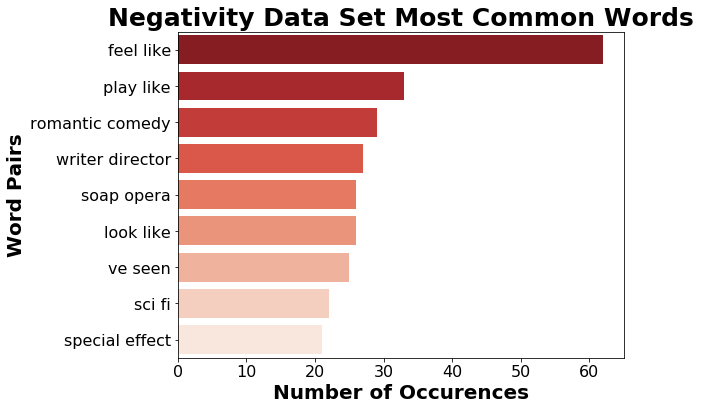

In [24]:
pos_plotter(pos_neg_sent_cv, 'Negativity')

Nothing super negative here. Let's check out the positive sentences.

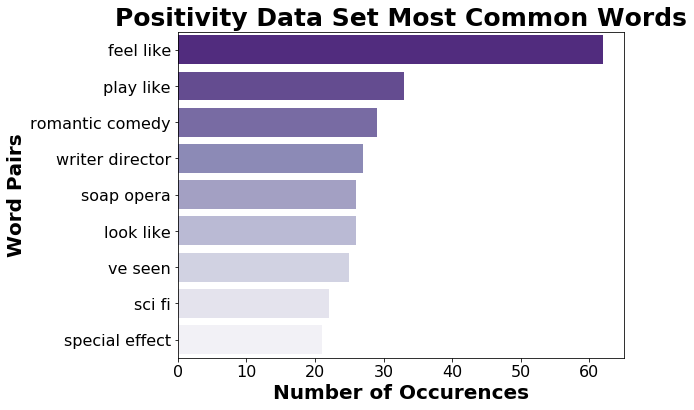

In [25]:
neg_plotter(pos_neg_sent_cv, 'Negativity')

Interesting. The words are very similar we'll have to drop some of these highly occurring words in the modelling process. Also the words seem to be largely about movies which is making me wonder where this data was collected from and how useful it will be later... We'll have to see.

In [26]:
# For memory efficiency i'm going to delete the count vectorized variables that we created earlier as well as some others.
del pos_neg_sent_cv, neg_sent, pos_sent

Let's move on to the next dataset.

# A Million Tweets
This dataset is slightly more interesting than the last one since it rates the level of Negativity on a scale between 0 and 4. `0` being negative `2` being neutral and `4` being positive, for each individual tweet. This will likely be more precise than the previous one. Here's some information on the data from the [website](https://www.kaggle.com/kazanova/sentiment140): `This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.` They used emoticons in tweets to classify the level of emotion. This is a far more accurate method of determining negative emotion on a large scale than using the words themselves due to the challenge posed by contextual word definitions. Also [here](https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf) is the pdf file written on the original project.

First we'll check out the data and see what changes we will need to make for it to be useful.

In [27]:
mill_tweets.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


There are a bunch of things that we are going to have to do in order to "normalize" this (For the mathematical people, I don't mean reducing the scale into a normal range). The first thing that we noticed when we first saw this is the fact that the target column is labeled `0`. Then we realized that the column names are really just more data and should have been a row. Let's fix that.

In [28]:
mill_tweets = mill_tweets.rename(columns = {'0': 'Negativity', 
                     "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D": 'Tweets'})[['Negativity', 'Tweets']]
mill_tweets.head()

,Negativity,Tweets
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


Since this is supposed to be a negativity evaluation we're going to rescale the Negativity column. When researching some of the discussions about the data there were many comments about there being no `2`s in the data set. If that is true then that will affect how we rescale so let's examine that now.

In [29]:
mill_tweets.Negativity.value_counts()

4    800000
0    799999
Name: Negativity, dtype: int64

Wow.... There's only `4`s and `0`s... Well, so much for that.... Okay it seems that the only classification was whether or not it was positive... We are going to look into the [pdf file](https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf) that was written on this project.... Hmmmmm.... There doesn't appear to be any mention of what their target column is supposed to look like. Also, the number of emoticons that they used is pretty limited.... However, it might still be better than our previous dataset since emoticons will still probably be more accurate at classifying the mood of each tweet. So from the next code block onwards `4` will become `0` and the original `0` will become `1`. One nice thing that comes out of this is that we can now combine the previous dataset with this one. But we'll get to that later. Right now, back to cleaning.

So for the tweets themselves we want to get rid of any of the `@` symbols and their attached names, and reduce the tweets down to the words themselves. We'll use the function that I used earlier as well as a new one to get rid of the `@words`.

In [30]:
mill_tweets['Tweets'] = mill_tweets['Tweets'].map(lambda x: ' '.join([i for i in x.split() if i[0] != '@']))

In [31]:
mill_tweets['Tweets'] = mill_tweets['Tweets'].apply(shorten)
# Check to make sure it worked
mill_tweets.head()

,Negativity,Tweets
0,0,is upset that he can't update his facebook by ...
1,0,i dived many time for the ball managed to save...
2,0,my whole body feel itchy and like it on fire
3,0,no it's not behaving at all i'm mad why am i h...
4,0,not the whole crew


In [32]:
mill_tweets['Negativity'] = mill_tweets['Negativity'].map({0:1, 4:0})

In [33]:
mill_tweets['Negativity'] = mill_tweets['Negativity'].astype(np.int32)

Now it's Vectorizing time!

In [34]:
# Split the data into features and target so I can CountVectorize it
X = mill_tweets['Tweets']
y = mill_tweets[['Negativity']]

try:
    mill_tweets_vec = vectorizer2000(X, y, 10_000, (2, 2))
    mill_tweets_vec.head()
except MemoryError:
    print('This is taking up too much memory use a smaller sample.')

This is taking up too much memory use a smaller sample.


Okay, my data set is too big to be read into memory while count vectorized so I'll take a smaller random sampling of it instead. We're going to need to keep this in mind for later. 

In [35]:
mill_tweets_test = mill_tweets.sample(n=20_000, random_state=42, )

In [36]:
# prevents a `min arg()` error that would pop up due to populating the dataframe with nulls.
mill_tweets_test = mill_tweets_test.reset_index().drop('index', axis=1)

In [37]:
# Round two.
X = mill_tweets_test['Tweets']
y = mill_tweets_test[['Negativity']]

try:
    mill_tweets_vec = vectorizer2000(X, y, 10_000, (2, 2))
except MemoryError:
    print('This is taking up too much memory use a smaller sample.')

It looks like we're down to a much smaller sample size than we originally planned. But no worries, it's still pretty big and should work fine. (Interesting to note that running the above function would at first use up 40% of the memory but then it would drop to 20%). We'll make a note to aim for 30,000 words when modelling but for now we can run with 10,000.
Plotting time.

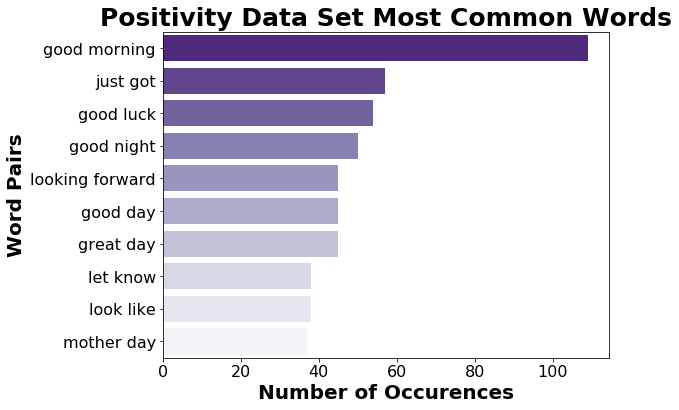

In [38]:
neg_plotter(mill_tweets_vec, 'Negativity')

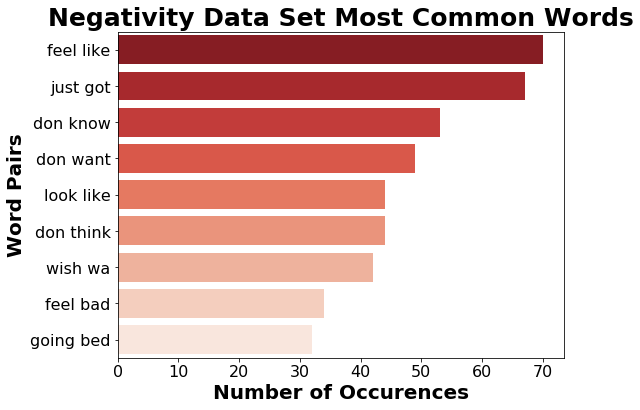

In [39]:
pos_plotter(mill_tweets_vec, 'Negativity')

There are plenty of words that we will remove in the eventual modelling process by using the min_df argument when count vectorizing. But anyways, onto the next data set. Let's put the two datasets together and save them.

In [40]:
mill_tweets_final = mill_tweets_test.rename(columns = ({'Tweets': 'Sentences'}))

In [41]:
# Align the columns
mill_tweets_final = mill_tweets_final[['Sentences', 'Negativity']]

In [42]:
# Put em togetha
sentences = pd.concat([mill_tweets_final, pos_neg_sent])

In [43]:
# Confirm that it worked
mill_tweets_final.shape

(20000, 2)

In [44]:
pos_neg_sent.shape

(10662, 2)

In [45]:
sentences.shape

(30662, 2)

In [46]:
# Save em
sentences.to_csv('../data/Training_Data/2_Cleaned_Training_Data/Cleaned_Pos_Neg_Sentences.csv')

In [47]:
# Memory efficiency as I mentiones before.
del sentences, mill_tweets_final, X, y, mill_tweets_vec, mill_tweets

Now that we've put them together, we'll move on for real.

## Data World Emotion Classifier

Another data set without much background information available but a brief glance at the first couple of rows and it seems pretty accurate. It's always possible that this is only true for the first couple of rows and the data set is just part of an elaborate conspiracy to prevent machines from really learning human emotions, but i'm not that paranoid.

Now, it's important to explain what is the purpose of the next couple of datasets. I want a separate classifier that simply establishes the negative *emotion* of a phrase. Not whether the phrase is altogether negative in any regard, like the previous data sets. This is based off the knowledge that generally high levels of negative emotion equals greater proclivity towards irrationality. In a therapy session it is likely for there to be high levels of negative emotion because, after all, that is why the client is going to therapy.

So let's jump right in.

In [48]:
six_emotions.head()

,Unnamed: 0,text,emotions
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love


I'm pretty excited about this dataset. Already we can see that there is a classification system for emotions. Let's examine a little closer.

In [49]:
six_emotions.emotions.value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

We have three negative emotions which is going to be our focus. But first let's get rid of the extra column.

In [50]:
six_emotions.drop('Unnamed: 0', axis=1, inplace=True)

I also see that the data appears to be already cleaned so I'm spared from doing that.
For now we'll turn the emotion column into a simple binary of Negative or Not. I haven't quite decided yet whether in my final analysis we'll use them in their original forms.

In [51]:
# Rename columns
six_emotions = six_emotions.rename(columns = {'text': 'Sentences', 'emotions': 'Negativity'})

In [52]:
# Check how many rows we got here.
six_emotions.shape

(416809, 2)

In [53]:
six_emotions.head()

,Sentences,Negativity
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love


In [54]:
# Binarize
six_emotions['Negativity'] = six_emotions['Negativity'].map({'joy': 0,         
                                        'sadness': 1,     
                                        'anger': 1,      
                                        'fear': 1,       
                                        'love': 0,       
                                        'surprise': 0})

In [55]:
# Confirm that it worked
six_emotions['Negativity'].value_counts()

1    226216
0    190593
Name: Negativity, dtype: int64

This is an easy one and we can go straight into Vectorizing.

In [56]:
# Split the data into features and target so I can CountVectorize it
X = six_emotions['Sentences']
y = six_emotions[['Negativity']]

try:
    six_emotions_vec = vectorizer2000(X, y, 10_000, (2, 2))
except MemoryError:
    print('This is taking up too much memory use a smaller sample.')

This is taking up too much memory use a smaller sample.


Oh lord, here we go again. Time to reduce our number of rows. But to cover all our bases we'll use some of the functions I used earlier as well.

In [57]:
six_emotions = six_emotions.sample(n=10_000, random_state=42)
six_emotions['Negativity'] = six_emotions['Negativity'].astype(np.int32)
six_emotions = six_emotions.reset_index().drop('index', axis=1)

In [58]:
X = six_emotions['Sentences']
y = six_emotions[['Negativity']]

try:
    six_emotions_vec = vectorizer2000(X, y, 20_000, (2, 2))
except MemoryError:
    print('This is taking up too much memory use a smaller sample.')

That worked! Let's plot them.

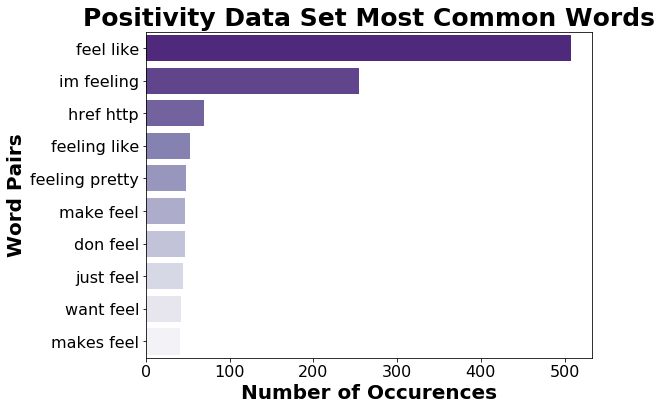

In [59]:
neg_plotter(six_emotions_vec, 'Negativity')

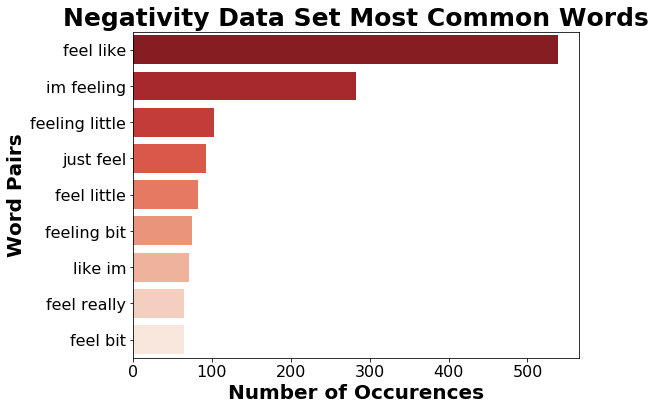

In [60]:
pos_plotter(six_emotions_vec, 'Negativity')

Some obvious words come up. Looks like "feel" is a very frequent one.
To finish up, let's save the cleaned dataset to a csv file.

In [61]:
six_emotions.to_csv('../data/Training_Data/2_Cleaned_Training_Data/Cleaned_Emotion_Analyzer.csv')

In [62]:
# Memory efficiency as I mentiones before.
del six_emotions, six_emotions_vec, X, y

## The Other Emotion Classifier

According to their website at [figure-eight](https://www.figure-eight.com/data-for-everyone/), "In a variation on the popular task of sentiment analysis, this dataset contains labels for the emotional content (such as happiness, sadness, and anger) of texts. Hundreds to thousands of examples across 13 labels. A subset of this data is used in an experiment we uploaded to Microsoft’s Cortana Intelligence Gallery." This is a second data set with a more solid background than our last one (at least as far as I can tell). Let's check it out.

In [63]:
twelve_emotions.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


To start let's drop the uneccsix_emotionsry data. So the rows `author` and `tweet_id` are out.

In [64]:
twelve_emotions.drop(['tweet_id', 'author'], axis=1, inplace=True)

Let's clean up the `content` column and check out the different values in the `sentiment` column. But we'll do the second thing first.

In [65]:
twelve_emotions.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

This DataSet covers a larger range of negative emotions than the previous one which is nice.

I'm wondering what those "empty" rows are.

In [66]:
twelve_emotions[twelve_emotions['sentiment']=='empty'].head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
44,empty,@creyes middle school and elem. High schools w...
52,empty,@djmicdamn hey yu lil fucker i textd yu
141,empty,@softtouchme just answered you- never learned ...
180,empty,Have a headache I'm going to bed. Goodnight!


I'm going to drop those rows because they might be misleading.

In [67]:
# Drop the rows
twelve_emotions = twelve_emotions[twelve_emotions['sentiment']!='empty']

Let's do the cleaning that I mentioned earlier. Here comes some functions.

In [68]:
twelve_emotions['content'] = twelve_emotions['content'].map(lambda x: ' '.join([i for i in x.split() if i[0] != '@']))

twelve_emotions['content'] = twelve_emotions['content'].apply(shorten)
# Check to make sure it worked
twelve_emotions.head()

,sentiment,content
1,sadness,layin n bed with a headache ughhhh waitin on y...
2,sadness,funeral ceremony gloomy friday
3,enthusiasm,want to hang out with friend soon
4,neutral,we want to trade with someone who ha houston t...
5,worry,re pinging why didn't you go to prom bc my bf ...


We also want to rename the columns.

In [69]:
twelve_emotions = twelve_emotions.rename(columns = {'content': 'Sentences', 'sentiment': 'Negativity'})

In [70]:
# Binarize to between "Negative" and not.
twelve_emotions['Negativity'] = twelve_emotions['Negativity'].map({'neutral': 0,  
                                            'worry': 1,       
                                            'happiness': 0,    
                                            'sadness': 1, 
                                            'love': 0,        
                                            'surprise': 0,    
                                            'fun': 0,         
                                            'relief': 0,      
                                            'hate': 1,        
                                            'empty': 0,       
                                            'enthusiasm': 0,  
                                            'boredom': 0,     
                                            'anger': 1})

We chose to label `boredom` as "Non-Negative" because as far as we know the emotion by itself doesn't lead to irrational thoughts. 

Count Vectorizing time.

In [71]:
# I needed this next line to prevent a `min arg()` error that would pop up due to populating the dataframe with nulls.
twelve_emotions = twelve_emotions.reset_index().drop('index', axis=1)

# Round two.
X = twelve_emotions['Sentences']
y = twelve_emotions[['Negativity']]

try:
    twelve_emotions_vec = vectorizer2000(X, y, 10_000, (2, 2))
except MemoryError:
    print('This is taking up too much memory use a smaller sample.')

This one worked on our first try!

Let's plot them

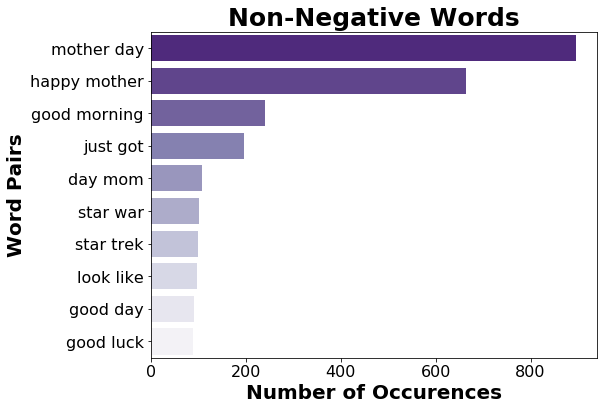

In [72]:
neg_plotter(twelve_emotions_vec, 'Negativity', 'Non-Negative Words')

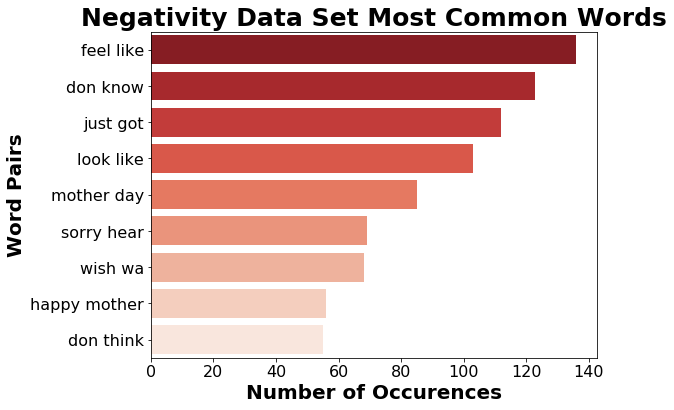

In [73]:
pos_plotter(twelve_emotions_vec, 'Negativity')

I love that the word `mother` comes up some much more in non-negative circumstances.

Let's save the cleaned dataset

In [74]:
twelve_emotions.to_csv('../data/Training_Data/2_Cleaned_Training_Data/Other_Cleaned_Emotion_Analyzer.csv')

In [75]:
# Memory efficiency as I mentiones before.
del twelve_emotions, twelve_emotions_vec, X, y

Now for our final dataset.

## Word Based Emotion Classification

**Description from the [website](https://www.kaggle.com/iwilldoit/emotions-sensor-data-set):**<br>
-First We Collected Thousands of Sentences, Blogs and Twitters all about 1.185.540 Words

-We Labeled Manually and Automatically this Sentences Into 7 Basic Emotion Disgust, Surprise ,Neutral ,Anger ,Sad ,Happy and Fear.

-Now We Choose The Top of Most Used 23 730 English Words

-Word by Word We Calculated The Probabilities of Existence of This Words in Disgust, Surprise ,Neutral ,Anger ,Sad ,Happy and Fear Sentences and Put Them in Simple CSV File

-We Used The Naive Bayes Algorithm To Calculate This Probabilities Of Existence Of This Words

**Purpose**: <br>
This dataset will actually be used as a model. The dataset contains about a eleven hundred words which we will use to "predict whether a statement is negative. When we check out what it looks like, it will become more clear.

In [76]:
word_emotions.head()

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346


This dataset has already been cleaned but i'll double check for null values and do summary statistics.

In [77]:
# Null check
word_emotions.isnull().sum().sum()

0

In [78]:
word_emotions.describe()

,disgust,surprise,neutral,anger,sad,happy,fear
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,0.012809,0.032376,0.008170,0.028224,0.027243,0.033701,0.030917
std,0.015313,0.025154,0.010011,0.024109,0.021836,0.026960,0.024391
min,0.000002,0.000003,0.000032,0.000003,0.000003,0.000003,0.000003
25%,0.002528,0.015640,0.000992,0.011905,0.011905,0.015306,0.014286
50%,0.007937,0.026907,0.003968,0.023810,0.023810,0.027778,0.026316
75%,0.017857,0.041245,0.011905,0.035714,0.035714,0.042857,0.038462
max,0.139456,0.135056,0.035714,0.137363,0.125000,0.137363,0.140538


Let's see some of the words with the highest weights. We'll create a function and print the words with the highest and lowest weights for every emotion.

In [79]:
def max_weight(column_name):
    print(word_emotions[word_emotions[column_name] == word_emotions[column_name].max()][['word', column_name]])
def min_weight(column_name):
    print(word_emotions[word_emotions[column_name] == word_emotions[column_name].min()][['word', column_name]])

In [80]:
column_list = list(word_emotions.columns)

In [81]:
column_list.remove('word')

In [82]:
for column in column_list:
    max_weight(column)
    print('\n')
    min_weight(column)
    print('\n')

       word   disgust
758  porno   0.139456


      word   disgust
442  gift   0.000002


        word  surprise
34  amazing   0.135056


         word  surprise
18  advanced   0.000003


                 word   neutral
7           accuracy   0.035714
13         addresses   0.035714
14     administrator   0.035714
15             adobe   0.035714
21     advertisement   0.035714
29           alabama   0.035714
38              anal   0.035714
46                ap   0.035714
48        apartments   0.035714
71           austria   0.035714
74               ave   0.035714
78             babes   0.035714
93               bbc   0.035714
119            bonus   0.035714
150               cc   0.035714
152          centers   0.035714
154               ch   0.035714
186     collectibles   0.035714
212        contained   0.035714
216         controls   0.035714
217       convention   0.035714
234         criteria   0.035714
241              cvs   0.035714
251            davis   0.035714
267         

Fascinating list of words. Wow! Although the fact that `Neutral` is repeated so many times is concerning. Well, anyways, that's all for this notebook. Next up we'll clean the testing data and then we'll start modelling.